# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
#setting the url and testing with city london
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key = weather_api_key
city = "London"
query_url = f"{url}units={units}&appid={api_key}"
city_url = f"{query_url}&q={city}"
city_url

'http://api.openweathermap.org/data/2.5/weather?units=metric&appid=fc2f54c909fcd312aae22047b193ed8c&q=London'

In [4]:
#getting the results for city London
city_weather = requests.get(city_url)
city_weather = city_weather.json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1732395504,
 'id': 2643743,
 'main': {'feels_like': 13.62,
          'grnd_level': 994,
          'humidity': 88,
          'pressure': 998,
          'sea_level': 998,
          'temp': 13.88,
          'temp_max': 14.58,
          'temp_min': 12.95},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 268730,
         'sunrise': 1732347151,
         'sunset': 1732377711,
         'type': 2},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 241, 'gust': 11.62, 'speed': 6.26}}


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}units={units}&appid={api_key}"
units = "metrics"
api_key = weather_api_key
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity =city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | broken hill
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bom jesus do galho
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | oualidia
City not found. Skipping...
Processing Record 7 of Set 1 | ishikawa
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | kokkola
Processing Record 10 of Set 1 | strathalbyn
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | west island
Processing Record 14 of Set 1 | mahajanga
Processing Record 15 of Set 1 | mecca
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | sur
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | mabaruma
Processing Record 20 of Set 1 | fuqing
Processing Record 21 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broken hill,-31.9500,141.4333,21.16,76,99,7.75,AU,1732395525
1,edinburgh of the seven seas,-37.0676,-12.3116,12.38,63,24,6.92,SH,1732395498
2,bom jesus do galho,-19.8289,-42.3161,18.70,92,100,1.51,BR,1732395792
3,yellowknife,62.4560,-114.3525,-13.71,78,100,1.54,CA,1732395793
4,mount gambier,-37.8333,140.7667,15.84,92,100,2.85,AU,1732395795


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,21.16,76,99,7.75,AU,1732395525
1,edinburgh of the seven seas,-37.0676,-12.3116,12.38,63,24,6.92,SH,1732395498
2,bom jesus do galho,-19.8289,-42.3161,18.70,92,100,1.51,BR,1732395792
3,yellowknife,62.4560,-114.3525,-13.71,78,100,1.54,CA,1732395793
4,mount gambier,-37.8333,140.7667,15.84,92,100,2.85,AU,1732395795


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

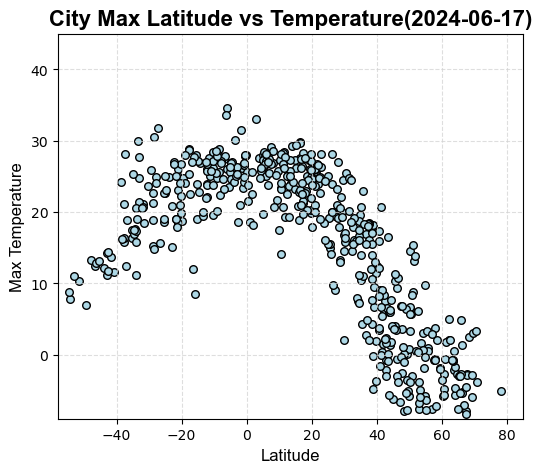

In [10]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color="lightblue", edgecolor="black", s=30)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Max Temperature", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Temperature(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-9, 45)
plt.xlim(-58, 85)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

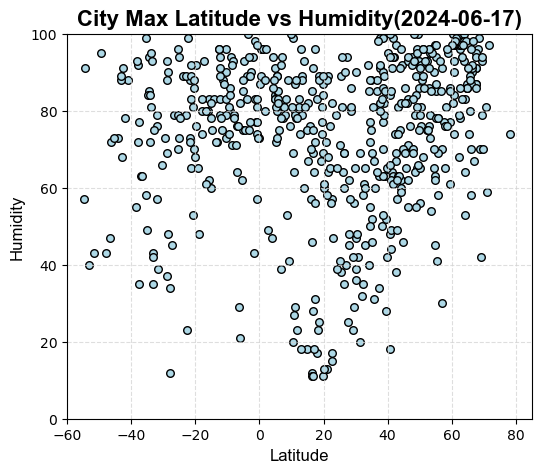

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color="lightblue", edgecolor="black", s=30)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Humidity(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(0, 100)
plt.xlim(-60, 85)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

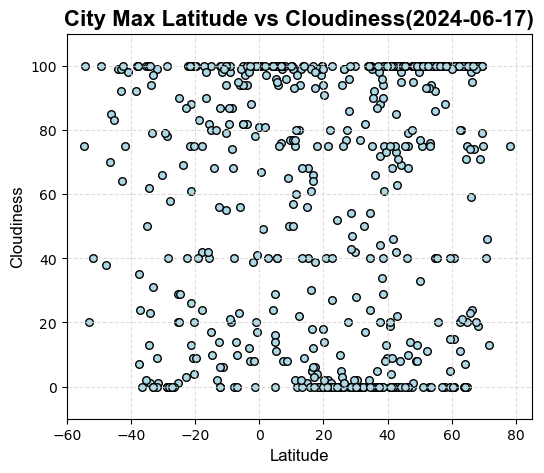

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color="lightblue", edgecolor="black", s=30)
# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Cloudiness", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Cloudiness(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-10, 110)
plt.xlim(-60, 85)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

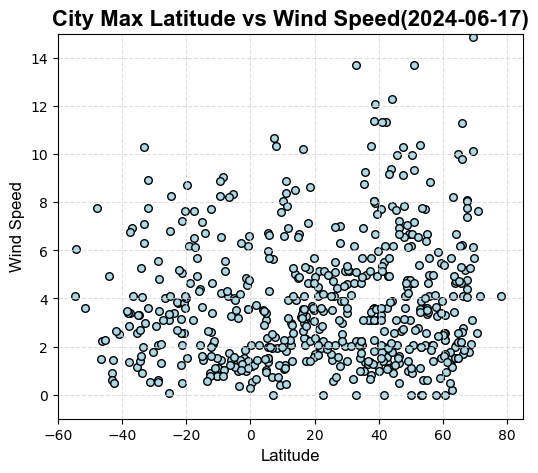

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(6, 5))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color="lightblue", edgecolor="black", s=30)

# Incorporate the other graph properties
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Wind Speed(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-1, 15)
plt.xlim(-60, 85)
# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print(f"The r^2 is: {rvalue**2}")
    plt.annotate(line_eq,(0,80),fontsize=15,color="red")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemidf= city_data_df['Lat'] >=0
northern_hemi_df=city_data_df.loc[north_hemidf]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,yellowknife,62.4560,-114.3525,-13.71,78,100,1.54,CA,1732395793
5,ishikawa,26.4233,127.8214,20.02,69,99,5.51,JP,1732395797
6,isafjordur,66.0755,-23.1240,-5.31,70,59,6.20,IS,1732395498
7,kokkola,63.8385,23.1307,0.52,93,0,4.63,FI,1732395799
13,mecca,21.4267,39.8261,25.69,64,0,1.97,SA,1732395806


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemidf= city_data_df['Lat'] < 0
southern_hemi_df=city_data_df.loc[south_hemidf]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,broken hill,-31.9500,141.4333,21.16,76,99,7.75,AU,1732395525
1,edinburgh of the seven seas,-37.0676,-12.3116,12.38,63,24,6.92,SH,1732395498
2,bom jesus do galho,-19.8289,-42.3161,18.70,92,100,1.51,BR,1732395792
4,mount gambier,-37.8333,140.7667,15.84,92,100,2.85,AU,1732395795
8,strathalbyn,-35.2667,138.9000,16.40,99,100,2.56,AU,1732395800


###  Temperature vs. Latitude Linear Regression Plot

The r^2 is: 0.7495424225312525


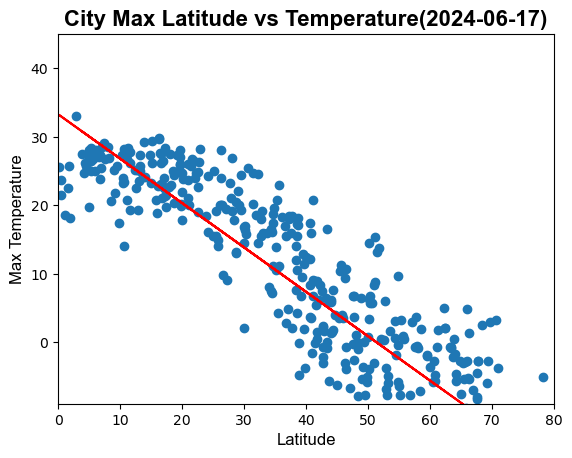

In [18]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Max Temperature", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Temperature(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-9, 45)
plt.xlim(0, 80)
lin_reg_plot(x= northern_hemi_df['Lat'],y= northern_hemi_df['Max Temp'])


The r^2 is: 0.4875824568559608


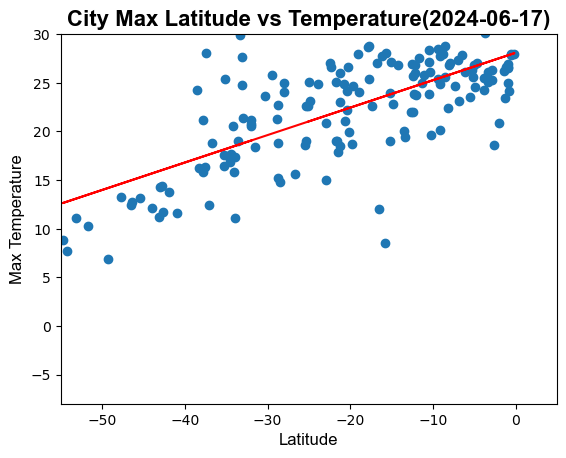

In [19]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Max Temperature", fontfamily="Arial", fontsize=12)
plt.title("City Max Latitude vs Temperature(2024-06-17)", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-8, 30)
plt.xlim(-55, 5)
lin_reg_plot(x= southern_hemi_df['Lat'],y= southern_hemi_df['Max Temp'])


**Discussion about the linear relationship:** Looking at the r^2 value for bothe the northern and southern hemisphere we can conclude that there is a correlation between the latitude and the temperature.We can see there is a negative correaltion in the northern hemisphere and a positive corelation in the southern hemisphere.In the northern hemisphere the temperature decrease as the latitude increases whereas in the southern hemisphere the temperature increases as the latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r^2 is: 0.07220923116064244


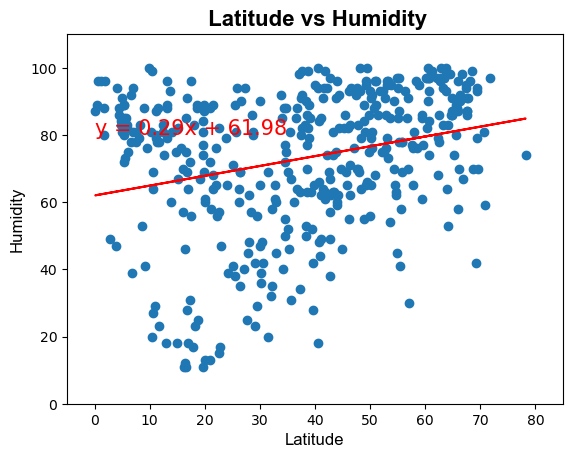

In [20]:
# Northern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(0, 110)
plt.xlim(-5, 85)
lin_reg_plot(x= northern_hemi_df['Lat'],y= northern_hemi_df['Humidity'])

The r^2 is: 0.051166128933220506


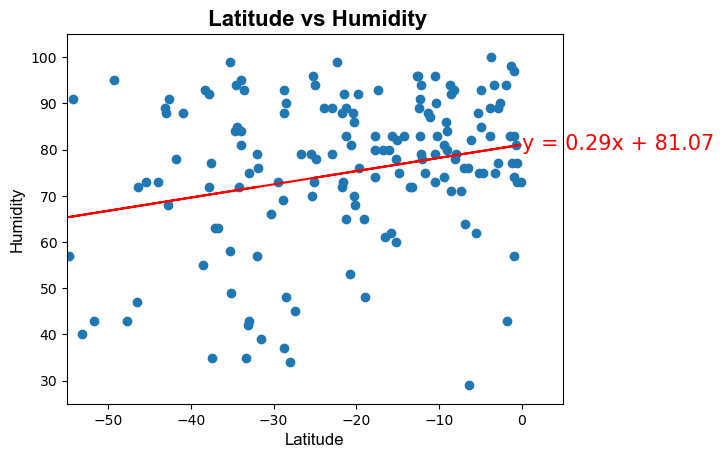

In [21]:
# Southern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Humidity", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(25, 105)
plt.xlim(-55, 5)
lin_reg_plot(x= southern_hemi_df['Lat'],y= southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** Looking at the r^2 value we can predict that there is a very weak relationship between the latitide and the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 is: 0.028139241745457646


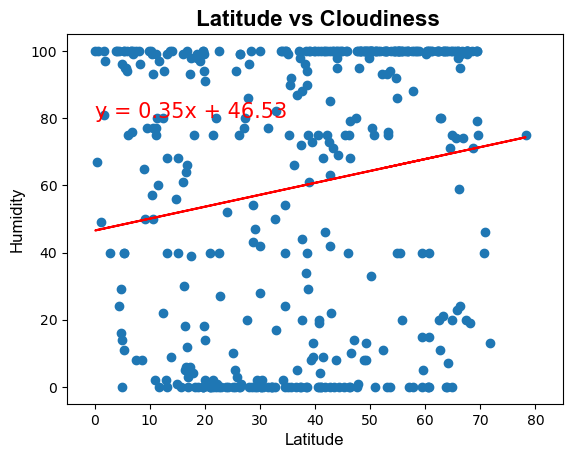

In [22]:
# Northern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-5, 105)
plt.xlim(-5,85)
lin_reg_plot(x= northern_hemi_df['Lat'],y= northern_hemi_df['Cloudiness'])

The r^2 is: 0.0017556839497964059


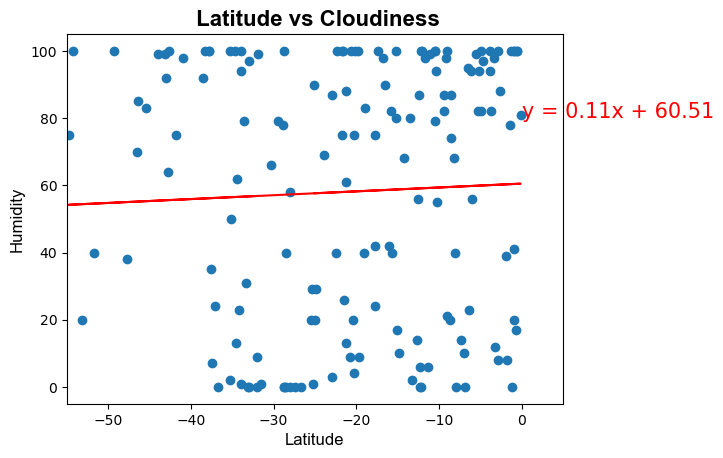

In [23]:
# Southern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Humidity", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Cloudiness", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-5, 105)
plt.xlim(-55,5)
lin_reg_plot(x= southern_hemi_df['Lat'],y= southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** When we look at the R^2 values we find that there is a weak correlation between latitude and cloudiness for both the hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 is: 0.018773536408557792


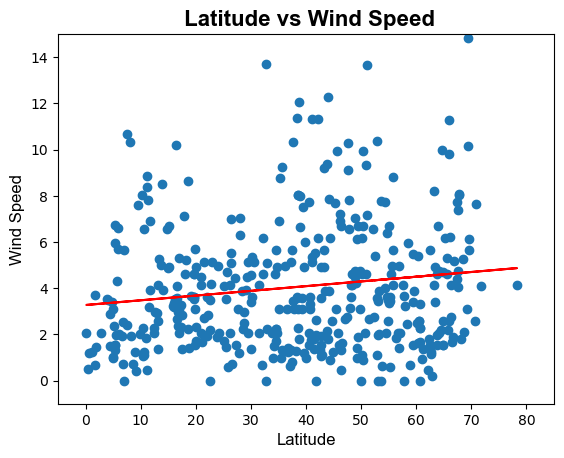

In [24]:
# Northern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-1, 15)
plt.xlim(-5,85)
lin_reg_plot(x= northern_hemi_df['Lat'],y= northern_hemi_df['Wind Speed'])

The r^2 is: 0.03125551182667046


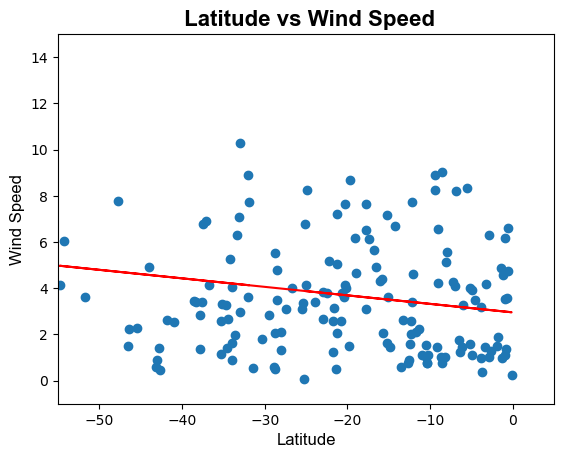

In [25]:
# Southern Hemisphere
plt.xlabel("Latitude", fontfamily="Arial", fontsize=12)
plt.ylabel("Wind Speed", fontfamily="Arial", fontsize=12)
plt.title(" Latitude vs Wind Speed", fontweight="bold", fontsize=16, fontfamily="Arial")
# Set X/Y Limits
plt.ylim(-1, 15)
plt.xlim(-55,5)
lin_reg_plot(x= southern_hemi_df['Lat'],y= southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** Looking at R^2 values there is a week relationship between the Latitude and the wind speed.